# Using `nomisma` geospatial data


## Minimal plot from geopandas


In [1]:
%matplotlib inline

import pandas as pd
import geopandas
from shapely.geometry import Point

In [2]:
URL = "https://raw.githubusercontent.com/neelsmith/nomisma/master/tables/mintpoints.csv"
FILE_HEADER = ['mint','lon','lat']
USE_COLS = ['mint','lon','lat']

In [3]:
df = pd.read_csv(
    URL, delimiter=",",
    names=FILE_HEADER, 
    usecols=USE_COLS,
    header=1
    )
type(df)

pandas.core.frame.DataFrame

In [4]:
mints = geopandas.GeoDataFrame(
    df.drop(['lon', 'lat'], axis=1),
    crs={'init': 'epsg:4326'},
    geometry=[Point(xy) for xy in zip(df.lon, df.lat)]
)

In [5]:
type(mints)


geopandas.geodataframe.GeoDataFrame

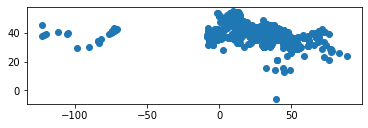

In [6]:
mints.plot()

## Markers on leaflet

In [7]:
import ipyleaflet
from ipyleaflet import Map, GeoData, basemaps, LayersControl

In [8]:
m = Map(center=(52.3,8.0), zoom = 3, basemap= basemaps.Esri.WorldTopoMap)

In [9]:
geo_data = GeoData(geo_dataframe = mints,
                   style={'color': 'black', 'fillColor': '#3366cc', 'opacity':0.05, 'weight':1.9, 'dashArray':'2', 'fillOpacity':0.6},
                   hover_style={'fillColor': 'red' , 'fillOpacity': 0.2},
                   name = 'Countries')
                                
m.add_layer(geo_data)                                
m.add_control(LayersControl())

## Plotting with contextilty backgrounds

In [10]:
import contextily

In [11]:
mints2 = mints.to_crs(epsg=3857)

/srv/conda/envs/notebook/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


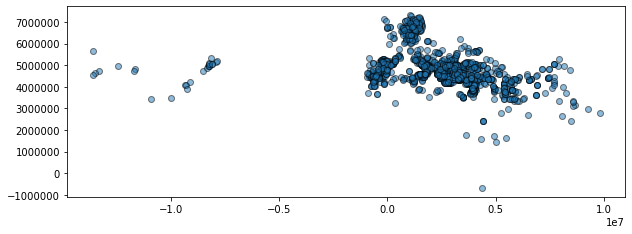

In [12]:
axx = mints2.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')



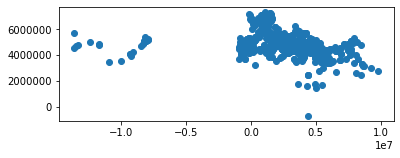

In [15]:
ax = mints2.plot()

In [16]:
contextily.add_basemap(ax, url=contextily.providers.Stamen.TonerLite)

<Figure size 432x288 with 0 Axes>